Creating Match Reports

In [1]:
from utils import load_display_options, ignore_warnings
load_display_options()
ignore_warnings()

In [2]:
import pandas as pd

from reports.report import Report
from reports.match_report import plot_expected_score_map, plot_expected_vaep_plot, plot_possession_chart, plot_statistics_table

In [3]:
# match_report = Report(rows=3, cols=3, height = 48, hspace=0)
# spec_setting = {'home': (4, 1), 'details': (3, 1), 'away': (4, 1)}
# match_report.create_gridspec(spec_setting)

# #Home
# plot_expected_score_map(ax=match_report.axs_dict['home'][0])
# plot_statistics_table(ax=match_report.axs_dict['home'][1])
# plot_expected_score_map(ax=match_report.axs_dict['home'][2])
# plot_expected_score_map(ax=match_report.axs_dict['home'][3])
# #Details
# plot_expected_vaep_plot(ax=match_report.axs_dict['details'][0])
# plot_possession_chart(ax=match_report.axs_dict['details'][1])
# plot_expected_vaep_plot(ax=match_report.axs_dict['details'][2])
# # Away
# plot_expected_vaep_plot(ax=match_report.axs_dict['away'][0])
# plot_possession_chart(ax=match_report.axs_dict['away'][1])
# plot_expected_vaep_plot(ax=match_report.axs_dict['away'][2])
# plot_expected_vaep_plot(ax=match_report.axs_dict['away'][3])

# match_report.fig.suptitle('This is a somewhat long figure title', fontsize=16)

Match Specific Plots

In [4]:
from visualisation.plotting_expected_score import plot_vertical_pitch_team_expected_score
from visualisation.plotting_inside50s import plot_vertical_pitch_team_inside50s
from visualisation.plotting_defensive50s import plot_vertical_pitch_team_defensive50s
from visualisation.plotting_possessions import plot_vertical_pitch_team_possessions
from visualisation.plotting_expected_score_worm import plot_expected_score_worm
from visualisation.plotting_match_statistics_table import plot_match_statistics_table

In [5]:
summary = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/match_summary.csv")
chains = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/playing_style_chains_v2.csv")
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/playing_style_stats_v2.csv")
match_id = "2022F4_Geelong_Sydney"

In [6]:
# from visualisation.visualise import load_fonts, load_mpl_style
# visualisation_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation"
# font_path = visualisation_path + "/fonts"
# style_path = visualisation_path + "/mplstyle/dark_theme.mplstyle"

# load_fonts(font_path)
# load_mpl_style(style_path)

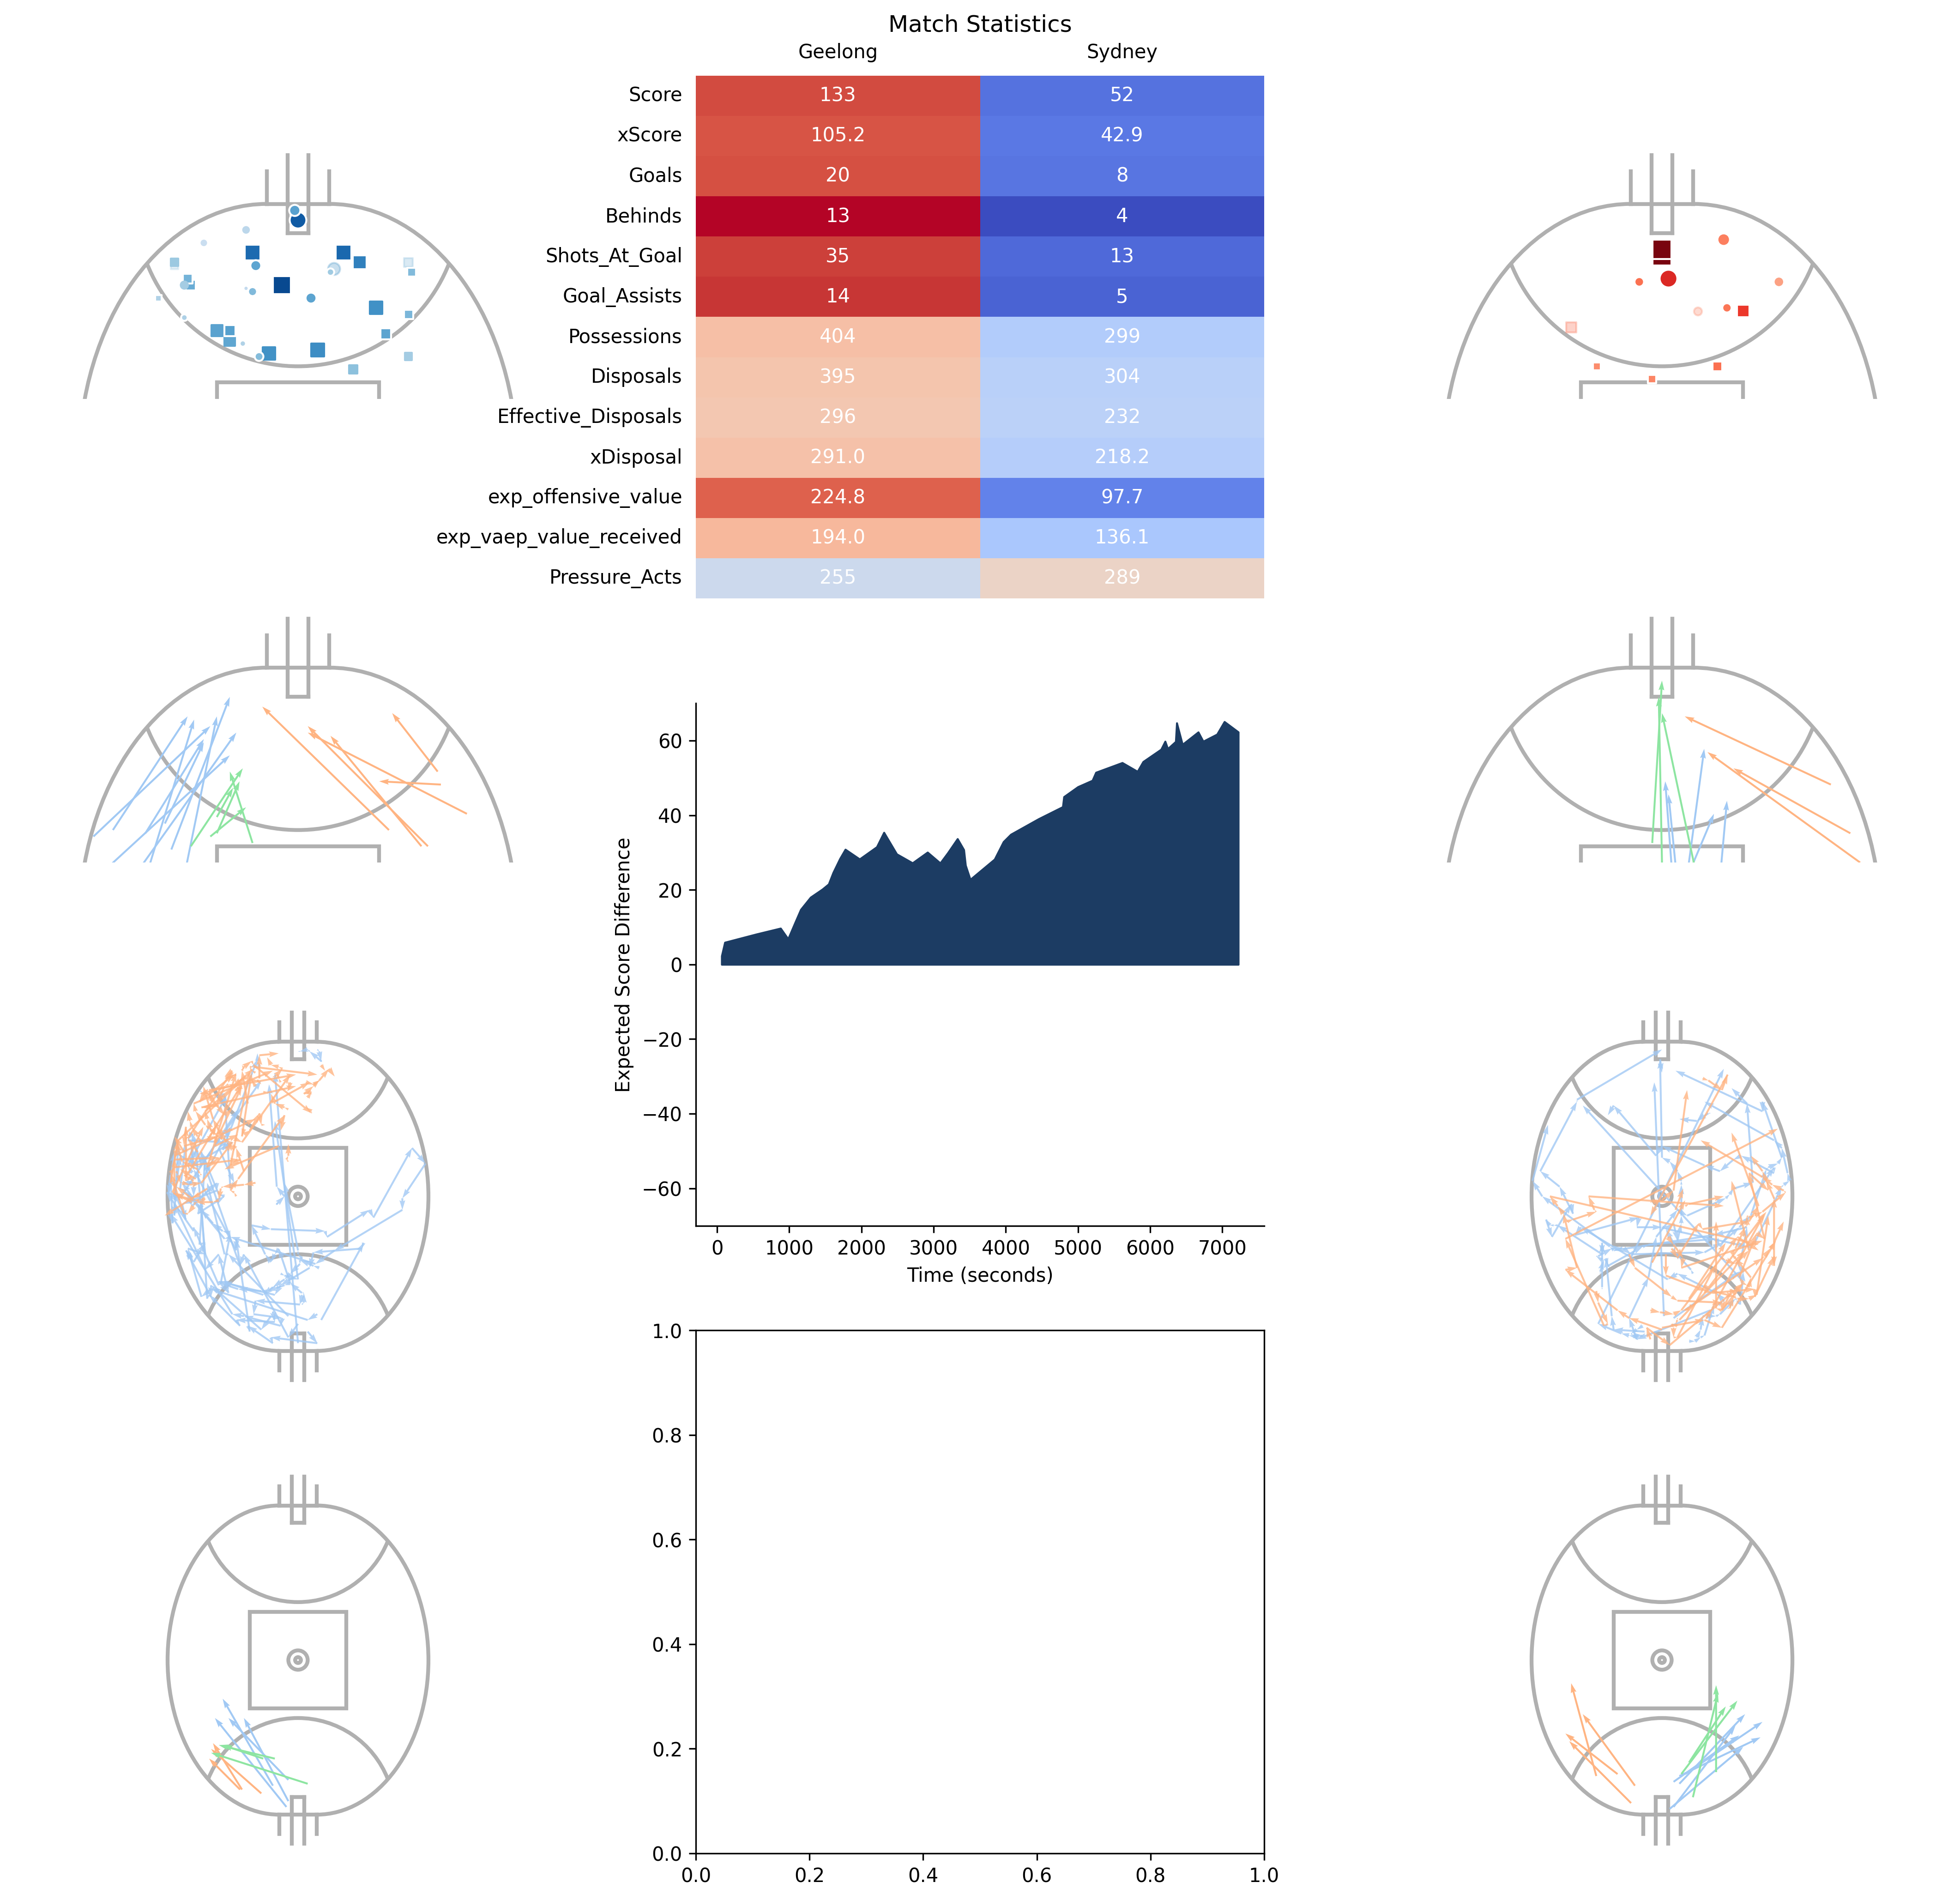

In [7]:
match_report = Report(rows=3, cols=3, height = 50, hspace=0)
spec_setting = {'home': (4, 1), 'details': (3, 1), 'away': (4, 1)}
match_report.create_gridspec(spec_setting)

#Home
home_team = 'Geelong'
plot_vertical_pitch_team_expected_score(ax=match_report.axs_dict['home'][0], chain_data=chains, match_id=match_id, team = home_team)
# Plot vertical heatmap: clusters of inside50 entries
plot_vertical_pitch_team_inside50s(ax = match_report.axs_dict['home'][1], chain_data = chains, match_id=match_id, team = home_team, clusters = 10, top_n = 3)
# Plot vertical pitch: clusters of possessions
plot_vertical_pitch_team_possessions(ax = match_report.axs_dict['home'][2], chain_data = chains, match_id=match_id, team = home_team, clusters = 10, top_n = 2)
# Plot vertical heatmap: clusters of defensive50 exits
plot_vertical_pitch_team_defensive50s(ax = match_report.axs_dict['home'][3], chain_data = chains, match_id=match_id, team = home_team, clusters = 10, top_n = 3)

# Details
# Plot table with match statistics
plot_match_statistics_table(ax = match_report.axs_dict['details'][0], summary = summary, player_stats = player_stats, match_id=match_id)
# Plot expected score worm
plot_expected_score_worm(ax = match_report.axs_dict['details'][1], chain_data=chains, match_id=match_id)
# Plot combined pitch heatmap of expected VAEP


# Away
away_team = "Sydney"
plot_vertical_pitch_team_expected_score(ax=match_report.axs_dict['away'][0], chain_data=chains, match_id=match_id, team = away_team)
# Plot vertical heatmap: clusters of inside50 entries
plot_vertical_pitch_team_inside50s(ax = match_report.axs_dict['away'][1], chain_data = chains, match_id=match_id, team = away_team, clusters = 10, top_n = 3)
# Plot vertical pitch: clusters of possessions
plot_vertical_pitch_team_possessions(ax = match_report.axs_dict['away'][2], chain_data = chains, match_id=match_id, team = away_team, clusters = 10, top_n = 2)
# Plot vertical heatmap: clusters of defensive50 exits
plot_vertical_pitch_team_defensive50s(ax = match_report.axs_dict['away'][3], chain_data = chains, match_id=match_id, team = away_team, clusters = 10, top_n = 3)

match_report.fig.dpi = 300